In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [17]:
dataset = pd.read_csv("letter-recognition.data")
dataset

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19995,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19996,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19997,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [18]:
x = dataset.drop('T',axis=1)
y = dataset['T']

In [19]:
x

,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19995,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19996,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19997,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [20]:
y

0        I
1        D
2        N
3        G
4        S
        ..
19994    D
19995    C
19996    T
19997    S
19998    A
Name: T, Length: 19999, dtype: object

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 10)

In [22]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [23]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [24]:
mlp = MLPClassifier(hidden_layer_sizes = (250, 300), max_iter = 1000000, activation = 'logistic')

In [25]:
# from yellowbrick.classifier import confusion_matrix
# cm = confusion_matrix(mlp,X_train,Y_train, X_validation, Y_validation, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

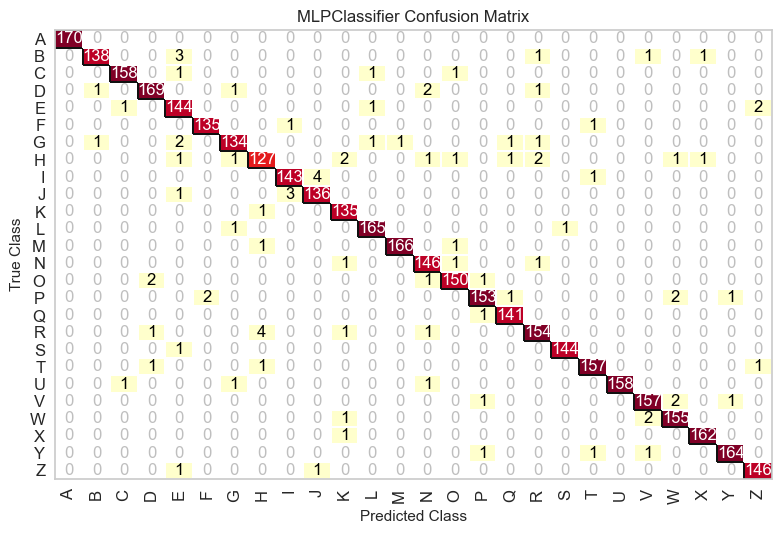

<AxesSubplot:title={'center':'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [26]:
from yellowbrick.classifier import ConfusionMatrix

# Initialize the visualization tool with the MLP classifier and set the labels for the classes.
classes = "A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(',')
cm = ConfusionMatrix(mlp, classes=classes, label_encoder={})

# Fit the classifier to the training data and display the confusion matrix for the validation data
cm.fit(x_train, y_train)
cm.score(x_test, y_test)
cm.show()

In [27]:
# pip install yellowbrick


In [28]:
cm.fit(x_train, y_train.values.ravel())
# ravel() converts a higher-dimensional array into a one-dimensional array.

ConfusionMatrix(ax=<AxesSubplot:title={'center':'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                         'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
                         'W', 'X', 'Y', 'Z'],
                cmap=<matplotlib.colors.ListedColormap object at 0x00000178D65E6E90>,
                estimator=MLPClassifier(activation='logistic',
                                        hidden_layer_sizes=(250, 300),
                                        max_iter=1000000))

In [29]:
cm.score(x_test, y_test)

0.97675

In [30]:
predictions = cm.predict(x_test)
predictions

array(['C', 'I', 'H', ..., 'R', 'B', 'W'], dtype='<U1')

In [31]:
print("Accuracy: ", accuracy_score(y_test, predictions))

Accuracy:  0.97675
